This notebook contains derivation of BCs, IC and g for example based on

Ralf Hartmann. Numerical Analysis of Higher Order Discontinuous
Galerkin Finite Element methods.
Institute of Aerodynamic and Flow Technology
DLR (German Aerospace Center). 13. Oct. 2008

### Solution

In [1]:
var("x_1, x_2, t, u")
# solution is
u(x_1, x_2) = sin(1/2*pi*x_1)*sin( 1/2*pi*x_2)
u

(x_1, x_2) |--> sin(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [2]:
du_1 = diff(u, x_1)
du_1

(x_1, x_2) |--> 1/2*pi*cos(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [3]:
du_2 = diff(u, x_2)
du_2

(x_1, x_2) |--> 1/2*pi*cos(1/2*pi*x_2)*sin(1/2*pi*x_1)

### Initial condition

In [4]:
u(t=0)

sin(1/2*pi*x_1)*sin(1/2*pi*x_2)

### Boundary conditions

In [5]:
# boundaries
top = 1
left = 0; right = 1
bottom = 0

In [6]:
# left
u(x_1 = left)

0

In [7]:
# left du
(du_1(x_1=left), du_2(x_1=left))

(1/2*pi*sin(1/2*pi*x_2), 0)

In [8]:
# right
u(x_1 = right)

sin(1/2*pi*x_2)

In [9]:
# right du
(du_1(x_1=right), du_2(x_1=right))

(0, 1/2*pi*cos(1/2*pi*x_2))

In [10]:
# bottom
u(x_2 = bottom)

0

In [11]:
# bottom du
(du_1(x_2=bottom), du_2(x_2=bottom))

(0, 1/2*pi*sin(1/2*pi*x_1))

In [12]:
# top
u(x_2 = top)

sin(1/2*pi*x_1)

In [13]:
# top du
(du_1(x_2=top), du_2(x_2=top))

(1/2*pi*cos(1/2*pi*x_1), 0)

### Right hand side $g$

In [14]:
diff(u, t)

(x_1, x_2) |--> 0

In [15]:
var("eps")

eps

In [16]:
diff(u, x_1)

(x_1, x_2) |--> 1/2*pi*cos(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [17]:
diff(u, x_1, 2)

(x_1, x_2) |--> -1/4*pi^2*sin(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [22]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
g = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2)) + (diff(u, x_1) + diff(u, x_2))
g

(x_1, x_2) |--> 1/2*pi^2*eps*sin(1/2*pi*x_1)*sin(1/2*pi*x_2) + 1/2*pi*cos(1/2*pi*x_2)*sin(1/2*pi*x_1) + 1/2*pi*cos(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [23]:
simplify(g)

(x_1, x_2) |--> 1/2*pi^2*eps*sin(1/2*pi*x_1)*sin(1/2*pi*x_2) + 1/2*pi*cos(1/2*pi*x_2)*sin(1/2*pi*x_1) + 1/2*pi*cos(1/2*pi*x_1)*sin(1/2*pi*x_2)

In [24]:
latex(g)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ \frac{1}{2} \, \pi^{2} \mathit{eps} \sin\left(\frac{1}{2} \, \pi x_{1}\right) \sin\left(\frac{1}{2} \, \pi x_{2}\right) + \frac{1}{2} \, \pi \cos\left(\frac{1}{2} \, \pi x_{2}\right) \sin\left(\frac{1}{2} \, \pi x_{1}\right) + \frac{1}{2} \, \pi \cos\left(\frac{1}{2} \, \pi x_{1}\right) \sin\left(\frac{1}{2} \, \pi x_{2}\right)

$$
g:
\left( x_{1}, x_{2} \right) \ {\mapsto} \ \frac{1}{2} \, \pi^{2} \mathit{eps} \sin\left(\frac{1}{2} \, \pi x_{1}\right) \sin\left(\frac{1}{2} \, \pi x_{2}\right) + \frac{1}{2} \, \pi \cos\left(\frac{1}{2} \, \pi x_{2}\right) \sin\left(\frac{1}{2} \, \pi x_{1}\right) + \frac{1}{2} \, \pi \cos\left(\frac{1}{2} \, \pi x_{1}\right) \sin\left(\frac{1}{2} \, \pi x_{2}\right)
$$

In [25]:
g.simplify_trig()

(x_1, x_2) |--> 1/2*pi*cos(1/2*pi*x_2)*sin(1/2*pi*x_1) + 1/2*(pi^2*eps*sin(1/2*pi*x_1) + pi*cos(1/2*pi*x_1))*sin(1/2*pi*x_2)

In [26]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
gd = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2))
gd

(x_1, x_2) |--> 1/2*pi^2*eps*sin(1/2*pi*x_1)*sin(1/2*pi*x_2)

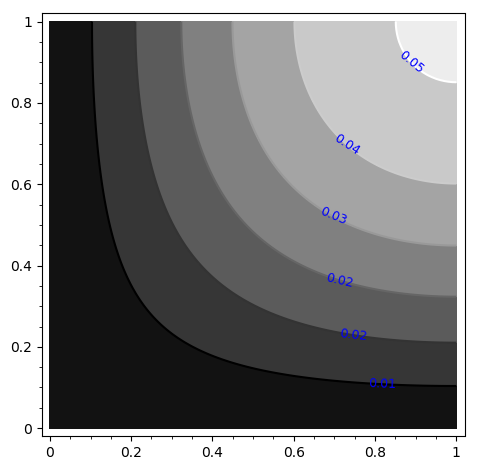

In [27]:
contour_plot(gd(eps=1e-2), (x_1, 0,1), (x_2, 0,1),  labels=True)

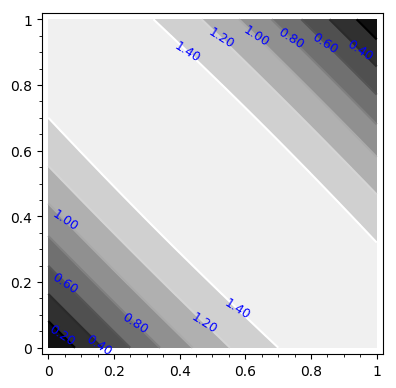

In [28]:
contour_plot(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1),  labels=True)

In [29]:
plot3d(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1))

Graphics3d Object

In [30]:
plot3d(gd(eps=1e-2), (x_1, 0,1), (x_2, 0,1))

Graphics3d Object

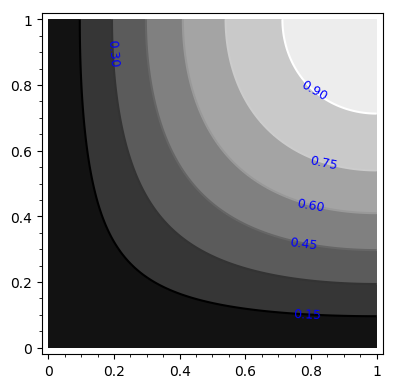

In [31]:
contour_plot(u, (x_1, 0,1), (x_2, 0,1), labels=True)

In [32]:
plot3d(u, (x_1, 0,1), (x_2, 0,1))

Graphics3d Object